# Exploratory Data Analysis of Google Play Store Apps

## Step 1: Import Libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the Datasets

In [46]:
apps_df = pd.read_csv(r'C:\Users\sharm\Downloads/googleplaystore.csv')
reviews_df = pd.read_csv(r'C:\Users\sharm\Downloads/googleplaystore_user_reviews.csv')

print("Google Play Store Apps Data:")
apps_df.head()

Google Play Store Apps Data:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [47]:
print("Google Play Store User Reviews Data:")
reviews_df.head()

Google Play Store User Reviews Data:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Explanation:
#### 1. apps_df is the main dataset with app details.
#### 2. reviews_df contains user reviews and sentiments.

## Step 4: Data Cleaning

##### We’ll clean both datasets, focusing on handling missing values, formatting columns correctly, and preparing the data for analysis.

#### Handling missing values in 'Rating' by filling with the mean value

In [48]:
apps_df['Rating'].fillna(apps_df['Rating'].mean(), inplace=True)

#### Removing rows where 'App' or 'Category' is missing

In [49]:
apps_df.dropna(subset=['App', 'Category'], inplace=True)

#### Convert 'Reviews' to integers

In [50]:
apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'].replace({'K': 'e3', 'M': 'e6', 'B': 'e9'},
regex=True), errors='coerce').fillna(0).astype(int)

In [51]:
apps_df['Installs'] = apps_df['Installs'].astype(str)
apps_df['Installs'] = apps_df['Installs'].str.replace(',', '').str.replace('+', '')
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')
apps_df['Installs'].fillna(0, inplace=True)
apps_df['Installs'] = apps_df['Installs'].astype(int)

apps_df['Price'] = apps_df['Price'].astype(str)
apps_df['Price'] = apps_df['Price'].str.replace('$', '')
apps_df['Price'] = pd.to_numeric(apps_df['Price'], errors='coerce')
apps_df['Price'].fillna(0, inplace=True)
apps_df['Price'] = apps_df['Price'].astype(float)



#### Display the cleaned datasets

In [52]:
reviews_df.dropna(subset=['Translated_Review', 'Sentiment'], inplace=True)


print("\nCleaned Apps Data:")
print(apps_df.head())
print("\nCleaned User Reviews Data:")
print(reviews_df.head())


Cleaned Apps Data:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159   19M     10000  Free    0.0       Everyone   
1      967   14M    500000  Free    0.0       Everyone   
2    87510  8.7M   5000000  Free    0.0       Everyone   
3   215644   25M  50000000  Free    0.0           Teen   
4      967  2.8M    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & D

## Step 5: Merging the Datasets

##### We merge the datasets using the common 'App' column so we can analyze the app information along with its reviews.

In [53]:
merged_df = pd.merge(apps_df, reviews_df, on='App', how='inner')

## Step 6: Data Visualization

#### Distribution of App Ratings

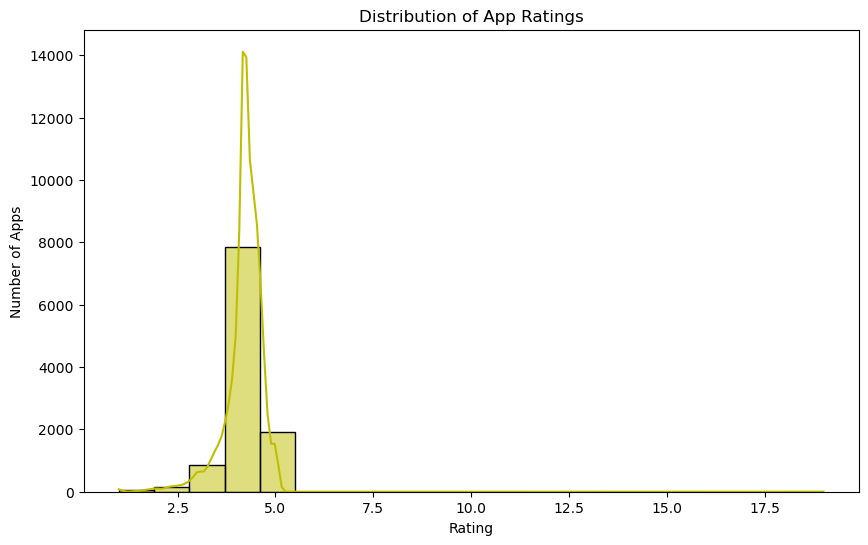

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(apps_df['Rating'], color='y',bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()

#### Count of Apps by Category

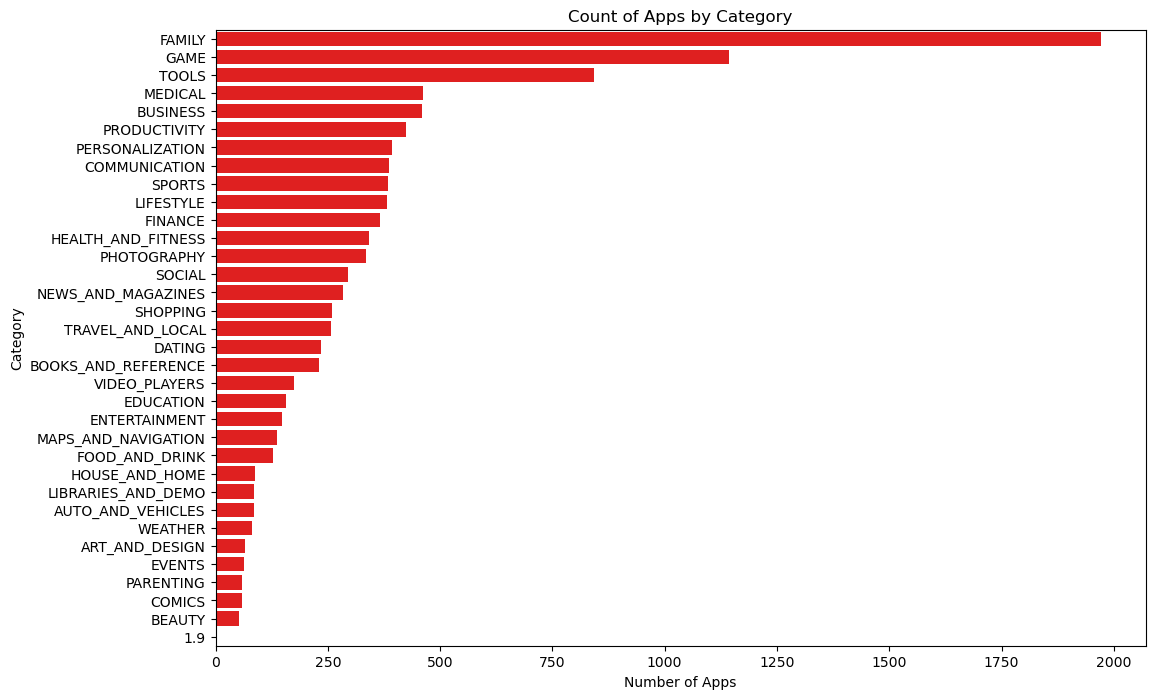

In [55]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Category',color='r' ,data=apps_df, order=apps_df['Category'].value_counts().index)
plt.title('Count of Apps by Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

#### Sentiment Distribution in Reviews

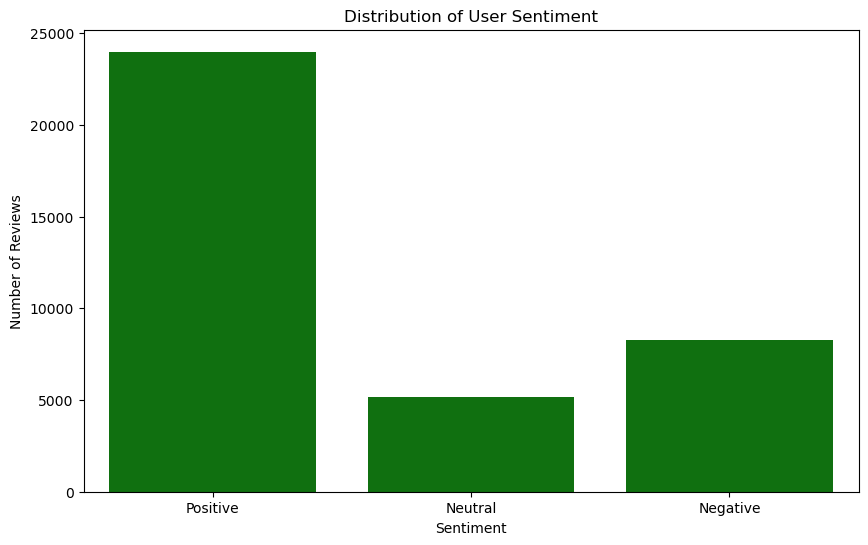

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=reviews_df, color='g')
plt.title('Distribution of User Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

## Step 7: Analyzing Key Metrics

#### Average rating by category

In [57]:
avg_rating_by_category = apps_df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print("\nAverage Rating by Category:")
print(avg_rating_by_category)


Average Rating by Category:
Category
1.9                    19.000000
EDUCATION               4.387778
EVENTS                  4.363647
ART_AND_DESIGN          4.350462
BOOKS_AND_REFERENCE     4.311026
PERSONALIZATION         4.307603
GAME                    4.282506
PARENTING               4.282223
HEALTH_AND_FITNESS      4.266296
BEAUTY                  4.260882
SHOPPING                4.254052
SOCIAL                  4.248001
WEATHER                 4.239675
SPORTS                  4.218404
PRODUCTIVITY            4.208287
HOUSE_AND_HOME          4.196819
FAMILY                  4.192394
PHOTOGRAPHY             4.192179
AUTO_AND_VEHICLES       4.190824
MEDICAL                 4.190167
LIBRARIES_AND_DEMO      4.181962
FOOD_AND_DRINK          4.170709
COMMUNICATION           4.163842
COMICS                  4.156445
BUSINESS                4.145987
NEWS_AND_MAGAZINES      4.142993
FINANCE                 4.139108
ENTERTAINMENT           4.126174
TRAVEL_AND_LOCAL        4.119716
LIFES

#### Most popular apps by installs

In [58]:
most_installed_apps = apps_df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)
print("\nTop 10 Most Installed Apps:")
print(most_installed_apps)


Top 10 Most Installed Apps:
                                           App    Installs
3896                            Subway Surfers  1000000000
3943                                  Facebook  1000000000
335   Messenger – Text and Video Chat for Free  1000000000
3523                              Google Drive  1000000000
3565                              Google Drive  1000000000
2884                             Google Photos  1000000000
3665                                   YouTube  1000000000
2853                             Google Photos  1000000000
4234             Skype - free IM & video calls  1000000000
3687                   Google Play Movies & TV  1000000000


## Step 8: Conclusion

### Summarize the findings:
#### 1. Top App Categories: Certain categories like "Family" and "Game" dominate the app market.
#### 2. User Reviews: Sentiment analysis shows that most reviews are positive or neutral, with only a few negative reviews.
#### 3. App Ratings: Most apps have ratings between 4 and 5, and there's a positive relationship between the number of installs and app ratings.